## Import Library

In [1]:
import pandas as pd;
import numpy as np;
from ydata_profiling import ProfileReport

c:\Users\Huawei\OneDrive - Universiti Malaya\Desktop\SEMESTER 7\WIE3007_Data-Mining\Group Project\data-mining-warehousing-wages-analysis\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [2]:
preprocessed_df = pd.read_csv("../../data/raw/combined_responses.csv", low_memory=False)
preprocessed_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Which categories of ML tools do you use on a regular basis?,Which categories of computer vision methods do you use on a regular basis?,Which of the following natural language processing (NLP) methods do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following cloud computing platforms do you use on a regular basis?,Which specific cloud computing products do you use on a regular basis?,Which specific big data / analytics products do you use on a regular basis?,Which of the following machine learning products do you use on a regular basis?,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?,Which of the following relational database products do you use on a regular basis?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 (USD),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499","> $100,000 ($USD)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,Automation of full ML pipelines (e.g. Google A...,"General purpose image/video tools (PIL, cv2, s...",NaN,"Scikit-learn , TensorFlow , Keras , Rand...",Microsoft Azure,"Azure Virtual Machines, Azure Container Service","Databricks, Microsoft Analysis Services",Azure Machine Learning Studio,NaN,Azure SQL Database
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,NaN,NaN,NaN,"Scikit-learn , RandomForest, Xgboost , Li...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19712,50-54,Male,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19713,18-21,Male,India,Bachelor’s degree,Other,250-999 employees,3-4,I do not know,$0-999,$0 (USD),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19714,35-39,Male,India,Master’s degree,Student,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19715,25-29,Male,India,Master’s degree,Statistician,50-249 employees,15-19,"We recently started using ML methods (i.e., mo...","1,000-1,999",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Headers

In [5]:
# Check for the column headers convention
print(preprocessed_df.columns)

Index(['What is your age (# years)?', 'What is your gender?',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired)',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'What is your current yearly compensation (approximate $USD)?',
       'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
       'What is the primary tool that you use at work or school to analyze data?',
       'How long have you been writing code to analyze data (at work or at school)?',
       'What 

In [6]:
# Remove leading and trailing spaces from column headers
df = preprocessed_df.rename(columns=lambda x: x.strip(), inplace=True)
# Check for the formatted columns names 
print(preprocessed_df.columns)

Index(['What is your age (# years)?', 'What is your gender?',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired)',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'What is your current yearly compensation (approximate $USD)?',
       'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
       'What is the primary tool that you use at work or school to analyze data?',
       'How long have you been writing code to analyze data (at work or at school)?',
       'What 

## Handle Missing Values

### Remove column with High Missing Value Percentage <br/>

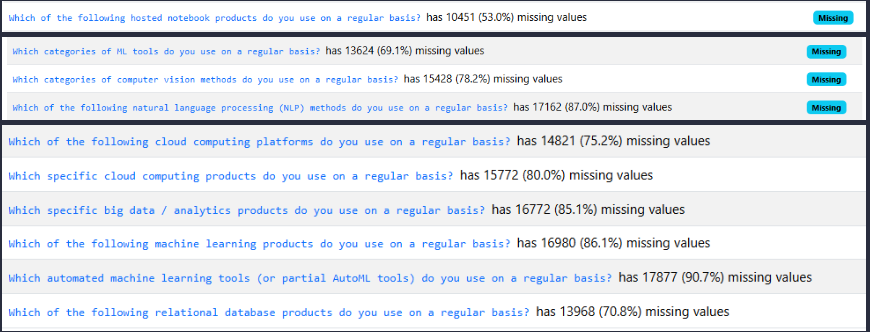

In [7]:
# Set the threshold of 50% for dropping columns
threshold = 0.5 * preprocessed_df.shape[0]

# Drop columns with more than 50% missing values
preprocessed_df = preprocessed_df.dropna(thresh=threshold, axis=1)

# Display the modified DataFrame to confirm columns are removed
preprocessed_df.head()

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 (USD),...,Never,1-2 years,"Twitter (data science influencers), Kaggle (fo...","Coursera, DataCamp, Kaggle Courses (i.e. Kaggl...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, SQL, Java, Javascript, MATLAB",Matplotlib,"CPUs, GPUs",Linear or Logistic Regression,NaN
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499","> $100,000 ($USD)",...,NaN,NaN,"Kaggle (forums, blog, social media, etc), YouT...","Coursera, DataCamp, Kaggle Courses (i.e. Kaggl...",NaN,NaN,NaN,NaN,NaN,NaN
2,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,Once,2-3 years,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...","Scikit-learn , TensorFlow , Keras , Rand..."
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,Never,< 1 years,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn , RandomForest, Xgboost , Li..."


In [8]:
preprocessed_df.shape

(19717, 23)

### Drop Rows with Missing Values

In [9]:
# Check that all columns exist in DataFrame
columns_with_missing = [
    'Which of the following machine learning frameworks do you use on a regular basis?',
    'What programming languages do you use on a regular basis?',
    'What data visualization libraries or tools do you use on a regular basis?',
    'Which types of specialized hardware do you use on a regular basis?',
    'Which of the following ML algorithms do you use on a regular basis?'
]

# Filter to keep only existing columns
existing_columns = [col for col in columns_with_missing if col in preprocessed_df.columns]

# Drop rows with missing values in the specified columns
preprocessed_df = preprocessed_df.dropna(subset=existing_columns)
preprocessed_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,Once,2-3 years,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...","Scikit-learn , TensorFlow , Keras , Rand..."
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,Never,< 1 years,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn , RandomForest, Xgboost , Li..."
5,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","60,000-69,999","$10,000-$99,999",...,Never,10-15 years,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",NaN,"RStudio , Other","Python, R",Ggplot / ggplot2,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn , TensorFlow , Keras , Rand..."
6,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,6-24 times,2-3 years,"Kaggle (forums, blog, social media, etc), Cour...","Udacity, Coursera, edX, Kaggle Courses (i.e. K...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, Bash","Matplotlib , Plotly / Plotly Express , Boke...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Scikit-learn , TensorFlow , Keras , PyTo..."
7,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),...,Once,3-4 years,"Hacker News (https://news.ycombinator.com/), B...","Udemy, University Courses (resulting in a univ...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Python,"Matplotlib , Plotly / Plotly Express",CPUs,"Linear or Logistic Regression, Decision Trees ...","Scikit-learn , TensorFlow , Keras , Spar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,25-29,Male,India,Master’s degree,Data Scientist,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,...,Never,2-3 years,"Hacker News (https://news.yc

In [10]:
preprocessed_df.shape

(11258, 23)

### Remove remaining missing rows

In [11]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]


In [15]:
# Drop rows with remaining missing values
# Check that all columns exist in DataFrame
columns_with_missing = [
    'What is the size of the company where you are employed?',
    'Approximately how many individuals are responsible for data science workloads at your place of business?',
    'Does your current employer incorporate machine learning methods into their business?',
    'What is your current yearly compensation (approximate $USD)?',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
    'Who/what are your favorite media sources that report on data science topics?',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?',
    'On which platforms have you begun or completed data science courses?'
]

# Filter to keep only existing columns
existing_columns = [col for col in columns_with_missing if col in preprocessed_df.columns]

# Drop rows with missing values in the specified columns
preprocessed_df = preprocessed_df.dropna(subset=existing_columns)
preprocessed_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,Once,2-3 years,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...","Scikit-learn , TensorFlow , Keras , Rand..."
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,Never,< 1 years,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn , RandomForest, Xgboost , Li..."
6,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,6-24 times,2-3 years,"Kaggle (forums, blog, social media, etc), Cour...","Udacity, Coursera, edX, Kaggle Courses (i.e. K...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, Bash","Matplotlib , Plotly / Plotly Express , Boke...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Scikit-learn , TensorFlow , Keras , PyTo..."
7,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),...,Once,3-4 years,"Hacker News (https://news.ycombinator.com/), B...","Udemy, University Courses (resulting in a univ...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Python,"Matplotlib , Plotly / Plotly Express",CPUs,"Linear or Logistic Regression, Decision Trees ...","Scikit-learn , TensorFlow , Keras , Spar..."
9,55-59,Male,Netherlands,Master’s degree,Other,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,...,Never,< 1 years,"Kaggle (forums, blog, social media, etc), Cour...",Coursera,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Python, SQL","Matplotlib , D3.js , Seaborn",CPUs,"Linear or Logistic Regression, Bayesian Approa...","Scikit-learn , PyTorch"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,25-29,Male,India,Master’s degree,Data Scientist,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,...,Never,2-3 years,"Hacker News (https://news.ycombi

In [16]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

c:\Users\Huawei\OneDrive - Universiti Malaya\Desktop\SEMESTER 7\WIE3007_Data-Mining\Group Project\data-mining-warehousing-wages-analysis\venv\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 27.76it/s]


### Address the imbalanced data profile

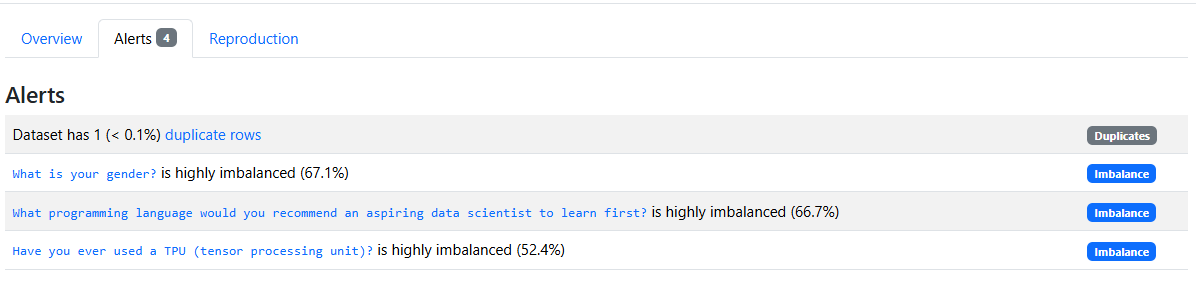

Address the imbalanced gender categorical data 
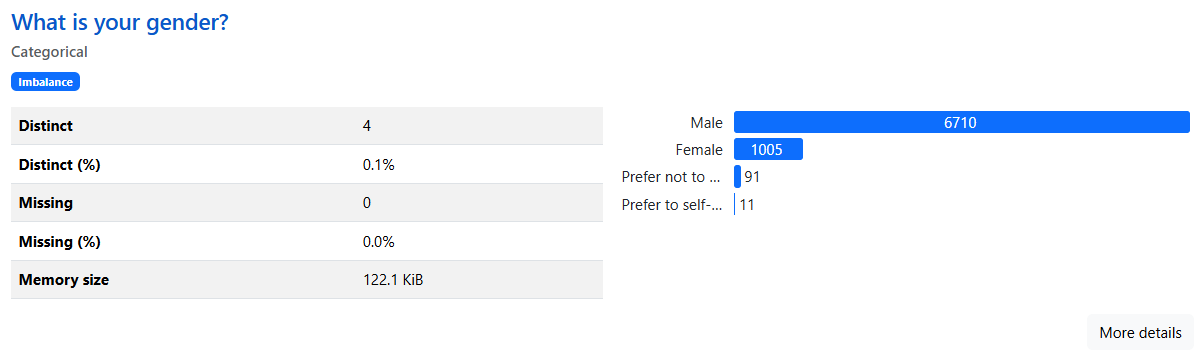

In [17]:
# Define the minor categories to be grouped
minor_categories = ["Prefer not to say", "Prefer to self-describe"]

# Calculate proportions of "Male" and "Female" and normalize to sum to 1
gender_counts = preprocessed_df['What is your gender?'].value_counts(normalize=True)
male_ratio = gender_counts['Male']
female_ratio = gender_counts['Female']
total_ratio = male_ratio + female_ratio

# Normalize the probabilities
male_ratio_normalized = male_ratio / total_ratio
female_ratio_normalized = female_ratio / total_ratio

# Map the minor categories proportionally to "Male" and "Female"
preprocessed_df['What is your gender?'] = preprocessed_df['What is your gender?'].apply(
    lambda x: np.random.choice(['Male', 'Female'], p=[male_ratio_normalized, female_ratio_normalized]) if x in minor_categories else x
)

# Verify the updated distribution
print(preprocessed_df['What is your gender?'].value_counts(normalize=True) * 100)

What is your gender?
Male      86.925931
Female    13.074069
Name: proportion, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_2676\3100594820.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What is your gender?'] = preprocessed_df['What is your gender?'].apply(


In [18]:
preprocessed_df.shape

(7817, 23)

Address the imbalanced programming language categorical data 
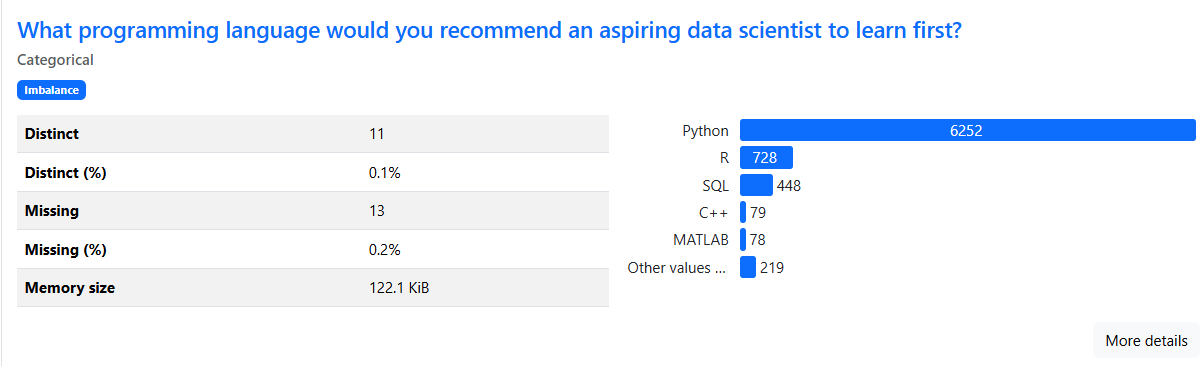

In [19]:
# Calculate the frequency distribution
language_distribution = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True) * 100
language_distribution

What programming language would you recommend an aspiring data scientist to learn first?
Python        80.112763
R              9.328549
SQL            5.740646
C++            1.012301
MATLAB         0.999487
Other          0.871348
C              0.743209
Java           0.615069
Javascript     0.307535
Bash           0.243465
TypeScript     0.025628
Name: proportion, dtype: float64

In [20]:
# Dynamically identify languages with less than 5% representation
languages_to_group = language_distribution[language_distribution < 5].index.tolist()

# Map languages with <5% frequency to "Other"
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df[
    'What programming language would you recommend an aspiring data scientist to learn first?'].apply(lambda x: 'Other' if x in languages_to_group else x)

# Verify the updated distribution after grouping
print(preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True) * 100)

What programming language would you recommend an aspiring data scientist to learn first?
Python    80.112763
R          9.328549
SQL        5.740646
Other      4.818042
Name: proportion, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_2676\979155889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df[


In [21]:
preprocessed_df.shape

(7817, 23)

Address the imbalanced TPU (tensor processing unit) Usage Data </br>
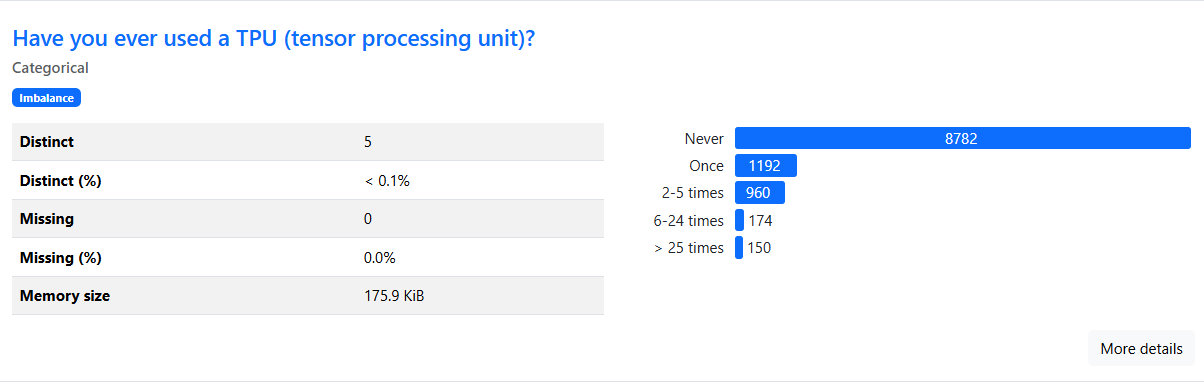
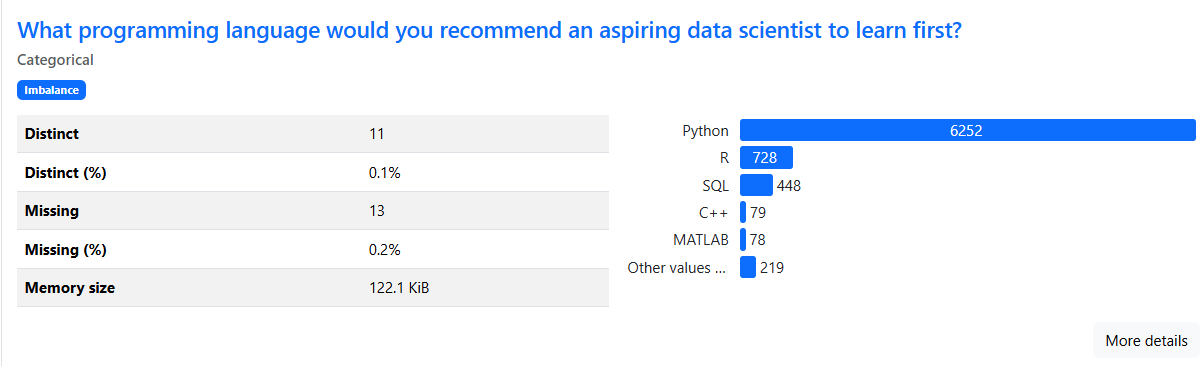

In [22]:
# Group responses into two categories: "Never" and "Used TPU"
preprocessed_df['Have you ever used a TPU (tensor processing unit)?'] = preprocessed_df['Have you ever used a TPU (tensor processing unit)?'].replace(
    {'Once': 'Used TPU', '2-5 times': 'Used TPU', '6-24 times': 'Used TPU', '> 25 times': 'Used TPU'}
)

# Verify the distribution
print(preprocessed_df['Have you ever used a TPU (tensor processing unit)?'].value_counts(normalize=True) * 100)

Have you ever used a TPU (tensor processing unit)?
Never       77.843162
Used TPU    22.156838
Name: proportion, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_2676\3915765275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['Have you ever used a TPU (tensor processing unit)?'] = preprocessed_df['Have you ever used a TPU (tensor processing unit)?'].replace(


### Remove duplicated rows 
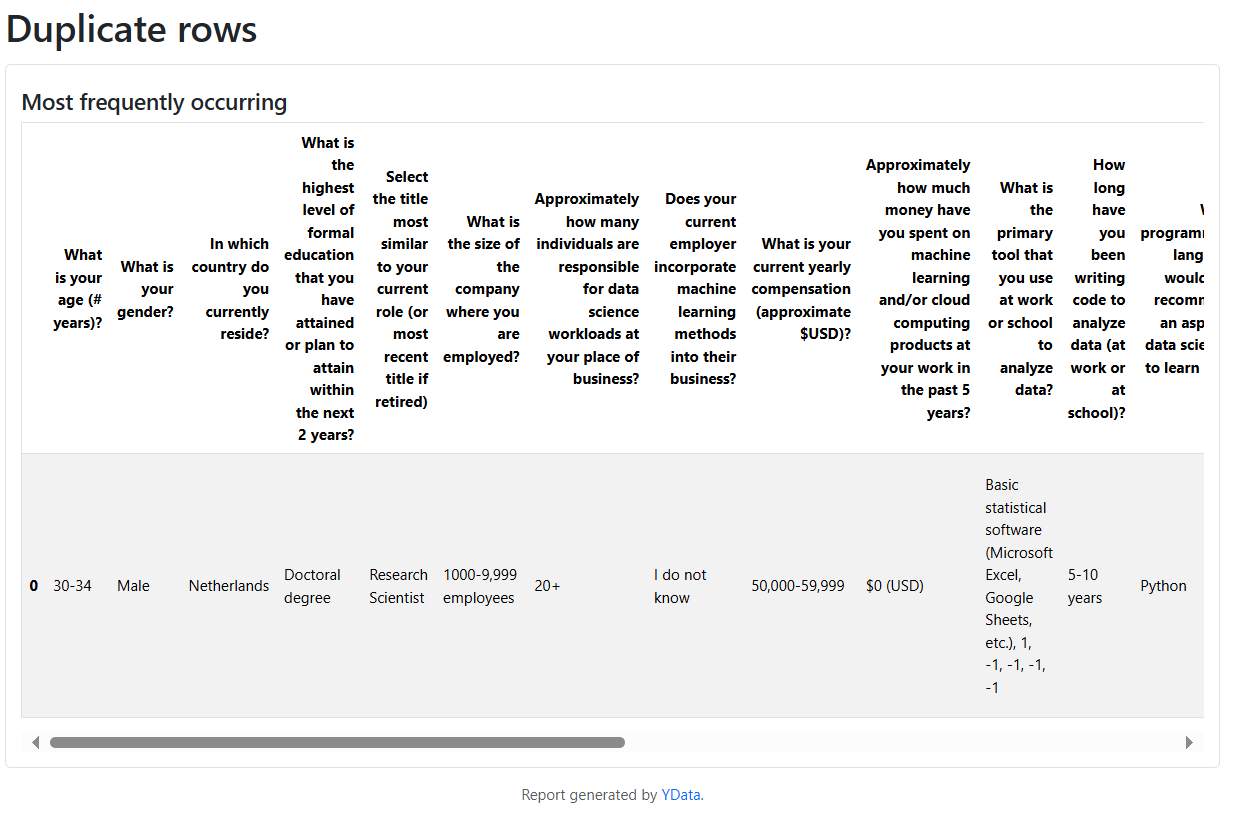

In [23]:
# Check for duplicates based on all columns
duplicates = preprocessed_df[preprocessed_df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates

Number of duplicate rows: 1


,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
17494,30-34,Male,Netherlands,Doctoral degree,Research Scientist,"1000-9,999 employees",20+,I do not know,"50,000-59,999",$0 (USD),...,Never,< 1 years,"Course Forums (forums.fast.ai, etc), Blogs (To...","Coursera, Fast.ai","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, MATLAB",Matplotlib,"CPUs, GPUs",Convolutional Neural Networks,Fast.ai


In [24]:
# Remove duplicates (keeping the first occurrence)
preprocessed_df = preprocessed_df.drop_duplicates()

# Verify removal
print(f"Number of rows after removing duplicates: {len(preprocessed_df)}")

Number of rows after removing duplicates: 7816


In [25]:
# Reset the index to maintain a clean, sequential order
preprocessed_df.reset_index(drop=True, inplace=True)

preprocessed_df.shape

(7816, 23)

In [26]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_data_cleaning.html')

c:\Users\Huawei\OneDrive - Universiti Malaya\Desktop\SEMESTER 7\WIE3007_Data-Mining\Group Project\data-mining-warehousing-wages-analysis\venv\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.87it/s]


### Addressed column health <br/> 
#### Before 
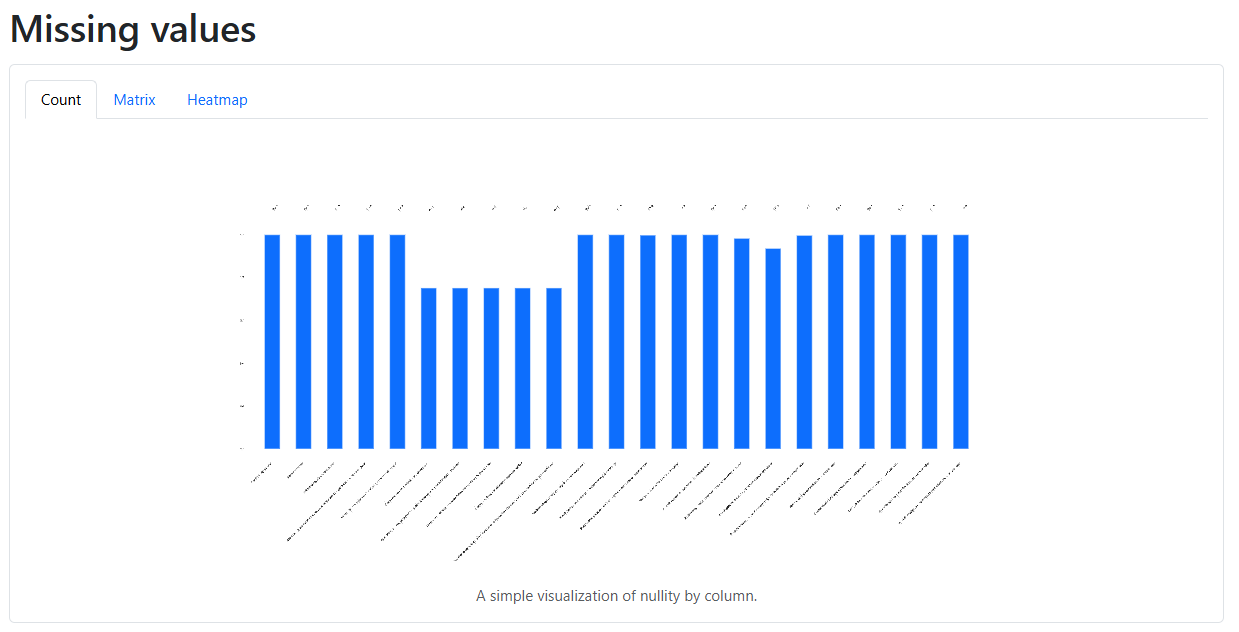

#### After 
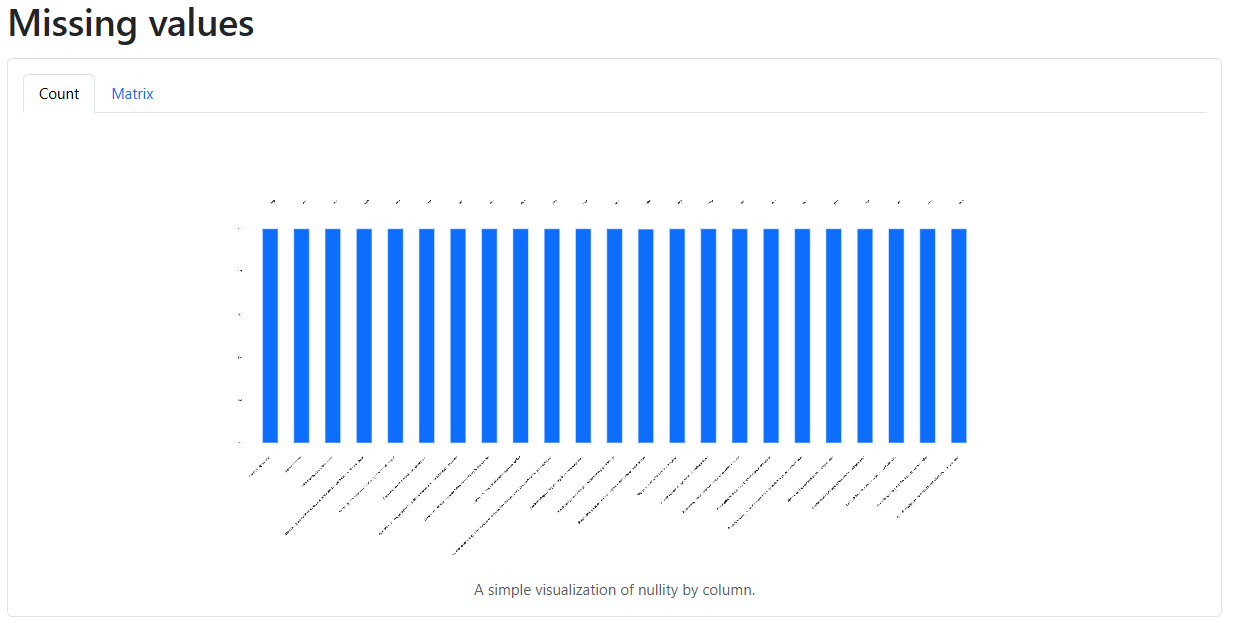

In [28]:
# Save to a new CSV
preprocessed_df.to_csv("../../data/cleaned_responses.csv", index=False)